# Práctica del primer parcial de Ciencia de Datos y Machine Learning
Se realizó un estudio de mercado. 8.371 personas votaron sobre si les gusta un dulce o no. En promedio, cada persona calificó 32 dulces, por lo que tenemos un total de alrededor de 269 mil calificaciones.
Analizaremos estos datos para obtener información sobre las características de los dulces que más le gusta a la gente

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

## Limpieza de datos

In [ ]:
data = pd.read_csv("/content/candy-data.csv")

In [3]:
# Comprobamos si tenemos registros incompletos en nuestro dataset
print ("Registros incompletos\n")
print (data.isnull().sum())

Registros incompletos

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64


Dada la anterior comprobación y teniendo presente que no tenemos registros incompletos, entonces no se requiere limpieza de datos.

## Determinación de los datos de entrenamiento y validación del modelo

Analizamos la correlación lineal entre las diferentes variables

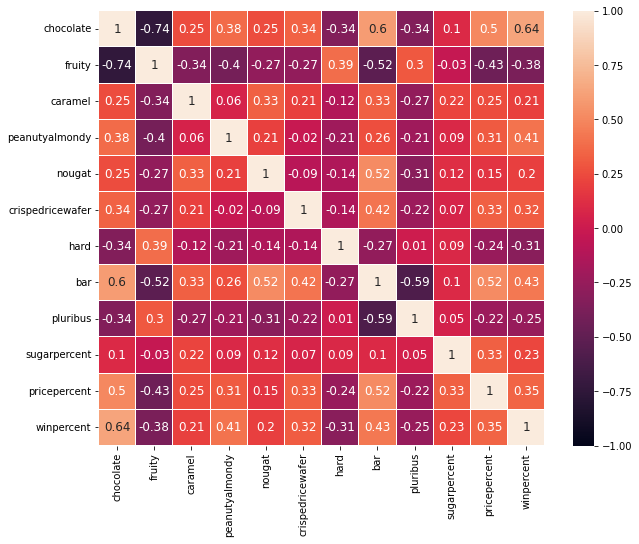

In [4]:
# Matriz de correlación (formato heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(round(data.corr(), 2), annot=True, vmin=-1, vmax = +1, linewidths=0.1, annot_kws={"fontsize":12})
plt.show()

### Función para validar el modelo
Definimos una función para obtener los resultados de la regresión conformados por:
- La varianza de las predicciones

  ![Varianza explicada](https://www.oreilly.com/library/view/mastering-python-for/9781789346466/assets/24beb2c6-1765-419a-b919-cdf3608a9789.png)

- El Error Logarítmico Cuadrático Medio (MSLE)

  ![MSLE](https://www.section.io/engineering-education/understanding-loss-functions-in-machine-learning/mean-squared-loss-error.PNG)

- El coeficiente de determinación ($R^2$)

  ![Coeficiente de determinación (R cuadrado)](https://economipedia.com/wp-content/uploads/R-Cuadrado-expresi%C3%B3n-300x192.jpg)

- El Error Absoluto Medio (MAE)

  ![MAE](https://www.section.io/engineering-education/understanding-loss-functions-in-machine-learning/mean-absolute-error.PNG)

- El Error Cuadrático Medio (Potencia) (MSE)

  ![MSE](https://www.section.io/engineering-education/understanding-loss-functions-in-machine-learning/mean-squared-error.PNG)

- El Error Cuadrático Medio (Raíz) (RMSE)

  ![RMSE](https://miro.medium.com/max/483/1*lqDsPkfXPGen32Uem1PTNg.png)

In [5]:
def regression_results(y_true, y_pred):
    # Evaluacion del desempenio de la regresion
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('Varianza de las predicciones: ', round(explained_variance,4))    
    print('Mean Squared Logarithmic Error (MSLE): ', round(mean_squared_log_error,4))
    print('Coeficiente de determinación (R cuadrado): ', round(r2,4))
    print('Mean Absolute Error (MAE): ', round(mean_absolute_error,4))
    print('Mean Square Error (MSE): ', round(mse,4))
    print('Root Mean Square Error (RMSE): ', round(np.sqrt(mse),4))

A continuación analizamos la relación entre winpercent y otras variables

In [6]:
# Regresion lineal
# y = winpercent, x = sugarpercent, pricepercent

y = data["winpercent"]
X = data[["sugarpercent", "pricepercent"]]

linear_regression_model = LinearRegression(fit_intercept=True)
linear_regression_model.fit(X, y)

y_pred = linear_regression_model.predict(X)
score = linear_regression_model.score(X, y)
mse = mean_squared_error(y, y_pred)

coeffs = pd.DataFrame(linear_regression_model.coef_, X.columns, columns=['coef'])
intercept  = linear_regression_model.intercept_

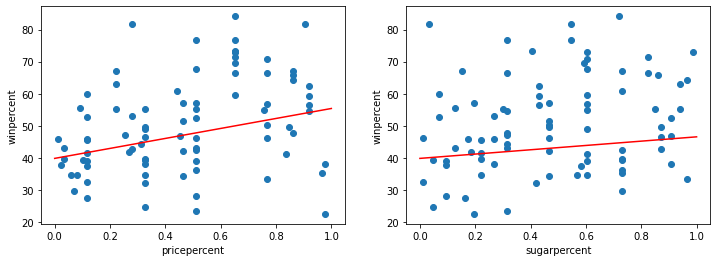

In [7]:
# Graficas
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.scatter(x=data["pricepercent"], y=data["winpercent"])

x = np.linspace(0, 1)
y1 = coeffs.values[1]*x + intercept
plt.plot(x, y1, "r-")
plt.xlabel("pricepercent")
plt.ylabel("winpercent")

plt.subplot(1, 2, 2)
plt.scatter(x=data["sugarpercent"], y=data["winpercent"])
y2 = coeffs.values[0]*x + intercept
plt.plot(x, y2, "r-")
plt.xlabel("sugarpercent")
plt.ylabel("winpercent")

plt.show()

In [8]:
# Resumen de los resultados obtenidos
print (f'Resumen de resultados de la regresion lineal:\n------------')
print (f'{coeffs}')
print (f'\nInteseccion con el eje Y: {round (intercept, 2)}')
print ("----------")
regression_results(y, y_pred)

Resumen de resultados de la regresion lineal:
------------
                   coef
sugarpercent   6.731072
pricepercent  15.586494

Inteseccion con el eje Y: 39.79
----------
Varianza de las predicciones:  0.1342
Mean Squared Logarithmic Error (MSLE):  0.0776
Coeficiente de determinación (R cuadrado):  0.1342
Mean Absolute Error (MAE):  10.7866
Mean Square Error (MSE):  185.2587
Root Mean Square Error (RMSE):  13.611


No se encontró una correlación significativa entre las variables winpercent y sugarpercent, tampoco entre winpercent y pricepercent. Entonces podemoms ignorar sugarpercent y pricepercent.

In [9]:
# Regresión lineal
# y = winpercent, x = chocolate, fruity, caramel, peanutalmondy, nougat, crispedricewafer, hard, bar, pluribus
y = data["winpercent"]
X = data.drop(["winpercent", "competitorname", "sugarpercent", "pricepercent"],axis=1)

linear_regression_model = LinearRegression(fit_intercept=True)
linear_regression_model.fit(X, y)

y_pred = linear_regression_model.predict(X)
score = linear_regression_model.score(X, y)
mse = mean_squared_error(y, y_pred)

coeffs = pd.DataFrame(linear_regression_model.coef_, X.columns, columns=['coef']).sort_values('coef', ascending = False)
intercept  = linear_regression_model.intercept_

In [10]:
# Resumen de los resultados obtenidos
print (f'Resumen de resultados de la regresion lineal:\n------------')
print (f'{coeffs}')
print (f'\nInteseccion con el eje Y: {round (intercept, 2)}')
print ("----------")
regression_results(y, y_pred)

Resumen de resultados de la regresion lineal:
------------
                       coef
chocolate         19.905795
fruity            10.267732
peanutyalmondy    10.141017
crispedricewafer   8.991549
caramel            3.384282
nougat             2.416252
pluribus          -0.159917
bar               -0.721966
hard              -4.872560

Inteseccion con el eje Y: 35.02
----------
Varianza de las predicciones:  0.5148
Mean Squared Logarithmic Error (MSLE):  0.0469
Coeficiente de determinación (R cuadrado):  0.5148
Mean Absolute Error (MAE):  8.121
Mean Square Error (MSE):  103.8138
Root Mean Square Error (RMSE):  10.1889


Se realizó una regresión lineal en todas las características, sin tener en cuenta el azúcar y el precio de donde se puede obtener las siguientes conclusiones:
- El chocolate aumenta el porcentaje de ganancias en un 20% en promedio.
- Los cacahuetes, el caramelo, el turrón, etc. tienen un efecto positivo, por lo que los dulces compuestos son significativos.
- La gente prefiere dulces con chocolates antes que con fruta (son mutuamente excluyentes).
- La forma del caramelo preferido es la barra sobre el duro.

Resultado: El caramelo que más le gusta a la gente es el chocolate en forma de barra que puede contener (opcional) algunos ingredientes extra como: "cacahuetes, mantequilla de maní o almendras" o "caramelos" o "turron" o "arroz crujiente, obleas o galleta"

In [11]:
perfect_candy_score = intercept+coeffs.values[0]+coeffs.values[2]+coeffs.values[3]+coeffs.values[4]+coeffs.values[5]+coeffs.values[7]
print (f'Puntuacion del caramelo perfecto: {round(perfect_candy_score[0], 1)}%')

Puntuacion del caramelo perfecto: 79.1%
